In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
import scipy.stats
import os
import scipy.io as sio
import scipy.ndimage
%matplotlib inline
from pylab import *

# Plotting Params:
rc('mathtext', default='regular')
fsize=20

In [3]:
data = sio.loadmat('snp_data/Reads.mat')
# A5SS
A5SS_data = data['A5SS']
A5SS_reads = np.array(A5SS_data.sum(1)).flatten()
A5SS_data = np.array(A5SS_data.todense())
# Get minigenes with reads
A5SS_nn = A5SS_data.sum(axis=1)>0
A5SS_reads = A5SS_reads[A5SS_nn]
A5SS_data = A5SS_data[A5SS_nn]
A5SS_data = A5SS_data/A5SS_data.sum(axis=1)[:,newaxis]
A5SS_seqs = pd.read_csv('snp_data/A5SS_Seqs.csv',index_col=0).Seq[A5SS_nn]

In [7]:
from keras.models import load_model
from pkg_resources import resource_filename
from utils2 import one_hot_encode
import numpy as np

a5ss_full='atggtgtccaagggcgaggagctgttcaccggggtggtgcccatcctggtcgagctggacggcgacgtaaacggccacaagttcagcgtcagcggcgagggcgagggcgatgccacctacggcaaactgaccctgaagttcatctgcaccaccggcaagctgcccgtgccctggcccaccctcgtgaccaccttcggctacggcctgatgtgcttcgcccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaagtgaagttcgagggcgacaccctcgtgaaccgcatcgagctaaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaaagtgaacttcaagatccgccacaacatcgaggtgcttggnnnnnnnnnnnnnnnnnnnnnnnnnggtcgacccaggttcgtgnnnnnnnnnnnnnnnnnnnnnnnnngaggtattcttatcaccttcgtggctacagagtttccttatttgtctctgttgccggcttatatggacaagcatatcacagccatttatcggagcgcctccgtacacgctattatcggacgcctcgcgagatcaatacgtataccagctgccctcgatacatgtcttggcatcgtttgcttctcgagtactacctggttcctcttctttctttctcttctctttcaggacggcagcgtgcagctcgccgaccactaccagcagaacacccccatcggcgacggccccgtgctgctgcccgacaaccactacctgagctaccagtccgccctgagcaaagaccccaacgagaagcgcgatcacatggtcctgctggagttcgtgaccgccgccgggatcactctcggcatggacgagctgtacaagga'.upper()
a3ss_full='atggtgtccaagggcgaggagctgttcaccggggtggtgcccatcctggtcgagctggacggcgacgtaaacggccacaagttcagcgtcagcggcgagggcgagggcgatgccacctacggcaaactgaccctgaagttcatctgcaccaccggcaagctgcccgtgccctggcccaccctcgtgaccaccttcggctacggcctgatgtgcttcgcccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaagtgaagttcgagggcgacaccctcgtgaaccgcatcgagctaaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaaagtgaacttcaagatccgccacaacatcgaggtaagttatcaccttcgtggctacagagtttccttatttgtctctgttgccggcttatatggacaagcatatcacagccatttatcggagcgcctccgtacacgctattatcggacgcctcgcgagatcaatacgtataccagctgccctcgatacatgtcttggacggggtcggtgttgatatcgtatNNNNNNNNNNNNNNNNNNNNNNNNNGCTTGGATCTGATCTCAACAGGGTNNNNNNNNNNNNNNNNNNNNNNNNNatgattacacatatagacacgcgagcacccatcttttatagaatgggtagaacccgtcctaaggactcagattgagcatcgtttgcttctcgagtactacctggtacagatgtctcttcaaacaggacggcagcgtgcagctcgccgaccactaccagcagaacacccccatcggcgacggccccgtgctgctgcccgacaaccactacctgagctaccagtccgccctgagcaaagaccccaacgagaagcgcgatcacatggtcctgctggagttcgtgaccgccgccgggatcactctcggcatggacgagctgtacaag'.upper()

context = 400

paths = ('snp_data/combined_2multi_14.h5'.format(x) for x in range(1, 2))
models = [load_model(resource_filename('spliceai', x)) for x in paths]

In [8]:
X_of_sd1=[]
X_of_sd2=[]
X_of_sd_crypt=[]
X_of_sd_new=[]


In [20]:

for i in range(212036,265044):
    new_seq=a5ss_full[:520]+A5SS_seqs[i]+a5ss_full[621:]
    x = one_hot_encode('N'*(context//2) + new_seq + 'N'*(context//2))[None, :]
    y = np.mean([models[m].predict(x) for m in range(1)], axis=0)

    donor_prob = y[1][0, :, 1]
    
    X_of_sd1.append(donor_prob[518 + 0])
    X_of_sd2.append(donor_prob[518 + 44])
    X_of_sd_crypt.append(donor_prob[518 + 79])
    
    tt=0.0
    
    for q in range(7,35):
        tt+=donor_prob[518 + q]
    
    for q in range(50,75):
        tt+=donor_prob[518 + q]

    X_of_sd_new.append(tt)

    if (i+1)%10000==0:
        print("done "+str(i+1))

done 220000
done 230000
done 240000
done 250000
done 260000


In [21]:
predicted_of_sd1=np.array(X_of_sd1)
predicted_of_sd2=np.array(X_of_sd2)
predicted_of_sd_crypt=np.array(X_of_sd_crypt)
predicted_of_sd_new=np.array(X_of_sd_new)

In [22]:
# Only include the first 80 positions and the the last position (unspliced)
Y = scipy.matrix(A5SS_data)
Y = scipy.hstack((Y[:,:80],Y[:,-1:]))

<ipython-input-22-a40d4dba94e8>:3: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  Y = scipy.hstack((Y[:,:80],Y[:,-1:]))


Text(0.5, 0, 'Model Predictions')

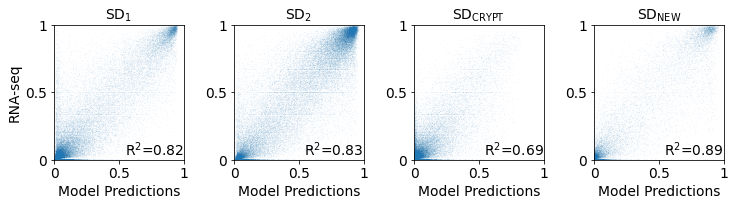

In [23]:


Y = np.array(Y)
a = 0.5
psize = .1
fsize = 13.85
rasterized_on = True
bins =50
axlim = [0,1,0,1]
hist_thresh = 300.

fig = figure(figsize=(10*1,1.875*1))
width=0.18
height = 1


#################################################################
#ax = fig.add_subplot(221)
ax = axes([0,0,width,height])
axis([0,1,0,1])
sd = 0
x,y = predicted_of_sd1,Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_1$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_1$',fontsize=fsize)
ax.set_ylabel('RNA-seq',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

####################################################################

ax = axes([0.25,0,width,height])
axis([0,1,0,1])
sd = 44
x,y = predicted_of_sd2,Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{2}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_2$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

#################################################################

ax = axes([0.5,0,width,height])
axis([0,1,0,1])
sd = 79
x,y = predicted_of_sd_crypt,Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_{CRYPT}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

###########################################################


ax = axes([0.75,0,width,height])
axis([0,1,0,1])
sd = 'other'
x = predicted_of_sd_new
y = sum(Y[212036:,5:35],axis=1) + sum(Y[212036:,48:77],axis=1)
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right',)
ax.set_title('$SD_{NEW}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)


In [ ]:
fig.savefig('gtex_donor.png', bbox_inches='tight',dpi=300)

### Make directory to save results:

In [2]:
resultsdir = '../results/N7_A5SS_Model_Predictions/'
if not os.path.exists(resultsdir):
    os.makedirs(resultsdir)
figdir = '../figures/N7_A5SS_Model_Predictions/'
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
#Choose if you want to actually save the plots:
SAVEFIGS = False

### Load data:

In [3]:
data = sio.loadmat('rosen/cell-2015-master/data/Reads.mat')
# A5SS
A5SS_data = data['A5SS']
A5SS_reads = np.array(A5SS_data.sum(1)).flatten()
A5SS_data = np.array(A5SS_data.todense())
# Get minigenes with reads
A5SS_nn = find(A5SS_data.sum(axis=1))
A5SS_reads = A5SS_reads[A5SS_nn]
A5SS_data = A5SS_data[A5SS_nn]
A5SS_data = A5SS_data/A5SS_data.sum(axis=1)[:,newaxis]
A5SS_seqs = pd.read_csv('rosen/cell-2015-master/data/A5SS_Seqs.csv',index_col=0).Seq[A5SS_nn]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  import sys


In [4]:
def predict(W,b,X):
    
    B = X*W+b;
    mx = amax(B);
    Z = scipy.matrix(mx+log(scipy.sum(exp(B-mx),axis=1)));
    try:
        B = B-Z
    except:
        B = B-Z.transpose()
    return np.array(exp(B))

In [5]:
def make_padded_nmer_matrix(seqs,mer_len):
    mer_dict = dict(zip(dnatools2.make_mer_list(6),range(4**6)))
    rows,cols,vals = [],[],[]
    for i in xrange(len(seqs)):
        cur_seq = A5SS_seqs[i]
        for b in range(7-mer_len,32)+range(50-mer_len,75):
            cur_mer = cur_seq[b:b+mer_len]
            cur_mer_list_pos = mer_dict[cur_mer]
            rows.append(i)
            cols.append(cur_mer_list_pos+4**mer_len*(b+80))
            vals.append(1)
        if(i%10000)==0:
            print i,
            
        # Add a zero to the bottom right of the matrix to ensure the
        # correct size
        rows.append(len(A5SS_data)-1)
        cols.append(4**6*230-1)
        vals.append(0)
    X = scipy.sparse.csr_matrix((vals,(rows,cols)))
    return X

In [6]:
X = make_padded_nmer_matrix(A5SS_seqs.values,6)

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 260000


Save the matrix with the splice donor usage into a .mat file:

In [9]:
# Only include the first 80 positions and the the last position (unspliced)
Y = scipy.matrix(A5SS_data)
Y = scipy.hstack((Y[:,:80],Y[:,-1:]))

In [8]:
combined_predictions = np.zeros((len(A5SS_data),81))

data = sio.loadmat('split_hal.mat')
# Check if the data file is an old file that include the minigenes with no reads:
if len(data['Test'])==265137:
    test_inds = find(data['Test'].ravel()[A5SS_nn]==1)
    combined_predictions[test_inds] = data['Prediction'][A5SS_nn][test_inds]
else:
    test_inds = find(data['Test'].ravel()==1)
    combined_predictions[test_inds] = data['Prediction'][test_inds]

IOError: [Errno 2] No such file or directory: 'split_hal.mat'

In [ ]:
combined_predictions[212036:]

In [84]:
combined_predictions2 = np.zeros((len(A5SS_data),81))
for i in range(10):
    print i,
    data = sio.loadmat('rosen/cell-2015-master/results/N7_A5SS_Model_Predictions/Partition'+str(i)+'/Training_data.mat')
    # Check if the data file is an old file that include the minigenes with no reads:
    if len(data['Test'])==265137:
        test_inds = find(data['Test'].ravel()[A5SS_nn]==1)
        combined_predictions2[test_inds] = data['Prediction'][A5SS_nn][test_inds]
    else:
        test_inds = find(data['Test'].ravel()==1)
        combined_predictions2[test_inds] = data['Prediction'][test_inds]

0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  # Remove the CWD from sys.path while we load stuff.


 1 2 3 4 5 6 7 8 9


In [85]:
combined_predictions2[212036:]

array([[6.94825655e-01, 1.68379717e-06, 3.68618604e-06, ...,
        1.68379717e-06, 2.53514930e-02, 8.96303941e-02],
       [3.62061874e-02, 1.50343132e-06, 2.86327383e-06, ...,
        1.50343132e-06, 1.33852283e-03, 5.51458319e-02],
       [4.69046699e-01, 3.13655963e-06, 4.38056139e-06, ...,
        3.13655963e-06, 2.13199187e-03, 1.00306629e-01],
       ...,
       [4.65795371e-01, 2.38850254e-06, 5.22893427e-06, ...,
        2.38850254e-06, 1.17195988e-01, 1.27142644e-01],
       [1.37198492e-01, 3.53824311e-06, 6.73855786e-06, ...,
        3.53824311e-06, 2.56150958e-01, 1.29782689e-01],
       [7.93496600e-02, 2.58575155e-06, 3.61129541e-06, ...,
        2.58575155e-06, 3.72138844e-02, 8.26918827e-02]])

Text(0.5,0,'Model Predictions')

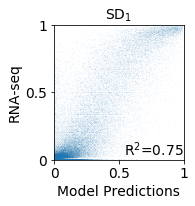

In [13]:
Y = np.array(Y)
a = 0.5
psize = .1
fsize = 13.85
rasterized_on = True
bins =50
axlim = [0,1,0,1]
hist_thresh = 300.

fig = figure(figsize=(10*1,1.875*1))
width=0.18
height = 1
#ax = fig.add_subplot(221)
ax = axes([0,0,width,height])
axis([0,1,0,1])
sd = 0
x,y = combined_predictions[212036:,sd],Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_1$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_1$',fontsize=fsize)
ax.set_ylabel('RNA-seq',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)


In [14]:
combined_predictions[212036:,sd].shape

(53008,)

In [15]:
Y[212036:,sd].shape

(53008,)

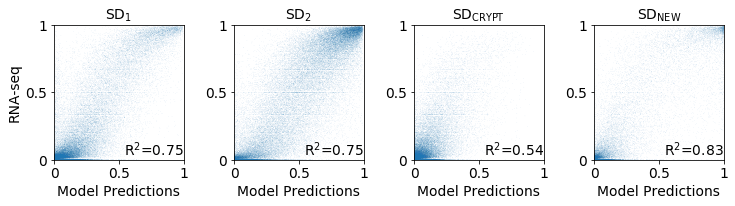

In [80]:
Y = np.array(Y)
a = 0.5
psize = .1
fsize = 13.85
rasterized_on = True
bins =50
axlim = [0,1,0,1]
hist_thresh = 300.

fig = figure(figsize=(10*1,1.875*1))
width=0.18
height = 1
#ax = fig.add_subplot(221)
ax = axes([0,0,width,height])
axis([0,1,0,1])
sd = 0
x,y = combined_predictions[212036:,sd],Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_1$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_1$',fontsize=fsize)
ax.set_ylabel('RNA-seq',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

ax = axes([0.25,0,width,height])
axis([0,1,0,1])
sd = 44
x,y = combined_predictions[212036:,sd],Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{2}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_2$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)


ax = axes([0.5,0,width,height])
axis([0,1,0,1])
sd = 79
x,y = combined_predictions[212036:,sd],Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_{CRYPT}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)


ax = axes([0.75,0,width,height])
axis([0,1,0,1])
sd = 'other'
x = sum(combined_predictions[212036:,5:35],axis=1) + sum(combined_predictions[212036:,48:77],axis=1)
y = sum(Y[212036:,5:35],axis=1) + sum(Y[212036:,48:77],axis=1)
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right',)
ax.set_title('$SD_{NEW}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

filename = 'HAL_split'
fig.savefig(filename+'.png', bbox_inches='tight',dpi=300)

In [9]:
from keras.models import load_model
from pkg_resources import resource_filename
from utils2 import one_hot_encode
import numpy as np

a5ss_full='atggtgtccaagggcgaggagctgttcaccggggtggtgcccatcctggtcgagctggacggcgacgtaaacggccacaagttcagcgtcagcggcgagggcgagggcgatgccacctacggcaaactgaccctgaagttcatctgcaccaccggcaagctgcccgtgccctggcccaccctcgtgaccaccttcggctacggcctgatgtgcttcgcccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaagtgaagttcgagggcgacaccctcgtgaaccgcatcgagctaaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaaagtgaacttcaagatccgccacaacatcgaggtgcttggnnnnnnnnnnnnnnnnnnnnnnnnnggtcgacccaggttcgtgnnnnnnnnnnnnnnnnnnnnnnnnngaggtattcttatcaccttcgtggctacagagtttccttatttgtctctgttgccggcttatatggacaagcatatcacagccatttatcggagcgcctccgtacacgctattatcggacgcctcgcgagatcaatacgtataccagctgccctcgatacatgtcttggcatcgtttgcttctcgagtactacctggttcctcttctttctttctcttctctttcaggacggcagcgtgcagctcgccgaccactaccagcagaacacccccatcggcgacggccccgtgctgctgcccgacaaccactacctgagctaccagtccgccctgagcaaagaccccaacgagaagcgcgatcacatggtcctgctggagttcgtgaccgccgccgggatcactctcggcatggacgagctgtacaagga'.upper()


# paths = ('400_data/NewOutputs/a5ss_spliceai13.h5'.format(x) for x in range(1))
# paths = ('SpliceAI400_g1.h5'.format(x) for x in range(1))
paths = ('only_a5ss_200_7.h5'.format(x) for x in range(1))
models = [load_model(resource_filename('spliceai', x)) for x in paths]

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/keras/models.py:258: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [10]:
context = 200

In [24]:
new_seq='ATCCACTGCAAGTCGGTCGAGGAGATCTCGACGCTGGTGCAGAAGCTGGCCGACCAGTCGGGCTTGGACGTGATCCGCATCCGCAAGCCCTTCCACACCGACAACCCTAGCATCCAGGGCCAGTGGCACCCCTTCACCAACAAGCCGACCACGTTCCGCGGGCTACGCCCCCGAGAGGTTCAGGATCCTGCCCCAGCCCAGGTACAAGCACAGTGAAGAGTTGCCCCACCAACTGCAGCCCCAGGCTTTGGACTGTTACTCCGGTAAAGGTGGTTCTTCCCCTTTGGGATTCCAAGCCCAGGCAAATGGAACCCATCAATGGGCAAGTTGACAGAGGTTCTGCTTGGGATAATGAAGAGCTGCCTGTTTCTTTCCAGTGCCTGCTTCTGGGGGCAGTGACCTTGTGAACCACTCATTTTTATGCAAGTGGCATCCCTAAAACCTGAGATGAGGAAGACTTCAA'
x = one_hot_encode('N'*(context//2) + new_seq + 'N'*(context//2))[None, :]
y = np.mean([models[m].predict(x) for m in range(1)], axis=0)

donor_prob1 = y[0, :, 2]

In [25]:
new_seq='ATCCACTGCAAGTCGGTCGAGGAGATCTCGACGCTGGTGCAGAAGCTGGCCGACCAGTCGGGCTTGGACGTGATCCGCATCCGCAAGCCCTTCCACACCGACAACCCTAGCATCCAGGGCCAGTGGCACCCCTTCACCAACAAGCCGACCACGTTCCGCGGGCTACGCCCCCGAGAGGTTCAGGATCCTGCCCCAGCCCAGGTGCAAGCACAGTGAAGAGTTGCCCCACCAACTGCAGCCCCAGGCTTTGGACTGTTACTCCGGTAAAGGTGGTTCTTCCCCTTTGGGATTCCAAGCCCAGGCAAATGGAACCCATCAATGGGCAAGTTGACAGAGGTTCTGCTTGGGATAATGAAGAGCTGCCTGTTTCTTTCCAGTGCCTGCTTCTGGGGGCAGTGACCTTGTGAACCACTCATTTTTATGCAAGTGGCATCCCTAAAACCTGAGATGAGGAAGACTTCAA'
x = one_hot_encode('N'*(context//2) + new_seq + 'N'*(context//2))[None, :]
y = np.mean([models[m].predict(x) for m in range(1)], axis=0)

donor_prob2 = y[0, :, 2]

In [26]:
donor_prob1.max(),donor_prob2.max()

(2.611362e-10, 2.6149954e-10)

In [11]:
X_of_sd1=[]
X_of_sd2=[]
X_of_sd_crypt=[]
X_of_sd_new=[]

In [12]:
for i in range(212036,265044):
    new_seq=a5ss_full[:520]+A5SS_seqs[i]+a5ss_full[621:]
    x = one_hot_encode('N'*(context//2) + new_seq + 'N'*(context//2))[None, :]
    y = np.mean([models[m].predict(x) for m in range(1)], axis=0)

    donor_prob = y[0, :, 2]
    
    X_of_sd1.append(donor_prob[518 + 0])
    X_of_sd2.append(donor_prob[518 + 44])
    X_of_sd_crypt.append(donor_prob[518 + 79])
    
    tt=0.0
    
    for q in range(5,35):
        tt+=donor_prob[518 + q]
    
    for q in range(48,77):
        tt+=donor_prob[518 + q]

    X_of_sd_new.append(tt)

    if (i+1)%10000==0:
        print "done "+str(i+1)

done 220000
done 230000
done 240000
done 250000
done 260000


In [13]:
predicted_of_sd1=np.array(X_of_sd1)
predicted_of_sd2=np.array(X_of_sd2)
predicted_of_sd_crypt=np.array(X_of_sd_crypt)
predicted_of_sd_new=np.array(X_of_sd_new)

Text(0.5,0,'Model Predictions')

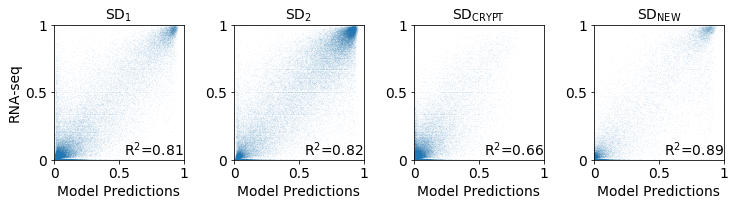

In [14]:
Y = np.array(Y)
a = 0.5
psize = .1
fsize = 13.85
rasterized_on = True
bins =50
axlim = [0,1,0,1]
hist_thresh = 300.

fig = figure(figsize=(10*1,1.875*1))
width=0.18
height = 1


#################################################################
#ax = fig.add_subplot(221)
ax = axes([0,0,width,height])
axis([0,1,0,1])
sd = 0
x,y = predicted_of_sd1,Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_1$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_1$',fontsize=fsize)
ax.set_ylabel('RNA-seq',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

####################################################################

ax = axes([0.25,0,width,height])
axis([0,1,0,1])
sd = 44
x,y = predicted_of_sd2,Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{2}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_2$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

#################################################################

ax = axes([0.5,0,width,height])
axis([0,1,0,1])
sd = 79
x,y = predicted_of_sd_crypt,Y[212036:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_{CRYPT}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

###########################################################


ax = axes([0.75,0,width,height])
axis([0,1,0,1])
sd = 'other'
x = predicted_of_sd_new
y = sum(Y[212036:,5:35],axis=1) + sum(Y[212036:,48:77],axis=1)
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right',)
ax.set_title('$SD_{NEW}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)


In [15]:

fig.savefig('200_spliceai.png', bbox_inches='tight',dpi=300)

In [14]:
filename = 'sd4_spliceai'
fig.savefig(filename+'.png', bbox_inches='tight',dpi=300)

In [19]:
X_of_sd1=[]
X_of_sd2=[]
X_of_sd_crypt=[]
X_of_sd_new=[]

In [20]:
for i in range(265044):
    new_seq=a5ss_full[:520]+A5SS_seqs[i]+a5ss_full[621:]
    x = one_hot_encode('N'*(context//2) + new_seq + 'N'*(context//2))[None, :]
    y = np.mean([models[m].predict(x) for m in range(1)], axis=0)

    donor_prob = y[0, :, 2]
    
    X_of_sd1.append(donor_prob[518 + 0])
    X_of_sd2.append(donor_prob[518 + 44])
    X_of_sd_crypt.append(donor_prob[518 + 79])
    
    tt=0.0
    
    for q in range(5,35):
        tt+=donor_prob[518 + q]
    
    for q in range(48,77):
        tt+=donor_prob[518 + q]

    X_of_sd_new.append(tt)

    if (i+1)%10000==0:
        print "done "+str(i+1)

done 10000
done 20000
done 30000
done 40000
done 50000
done 60000
done 70000
done 80000
done 90000
done 100000
done 110000
done 120000
done 130000
done 140000
done 150000
done 160000
done 170000
done 180000
done 190000
done 200000
done 210000
done 220000
done 230000
done 240000
done 250000
done 260000


In [21]:
predicted_of_sd1=np.array(X_of_sd1)
predicted_of_sd2=np.array(X_of_sd2)
predicted_of_sd_crypt=np.array(X_of_sd_crypt)
predicted_of_sd_new=np.array(X_of_sd_new)

Text(0.5,0,'Model Predictions')

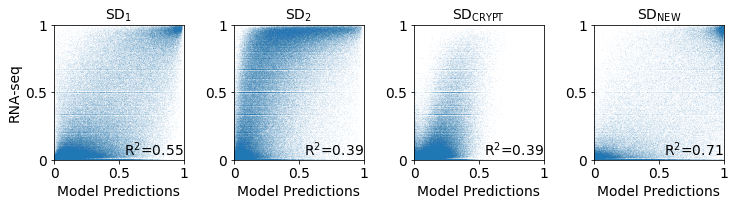

In [23]:
Y = np.array(Y)
a = 0.5
psize = .1
fsize = 13.85
rasterized_on = True
bins =50
axlim = [0,1,0,1]
hist_thresh = 300.

fig = figure(figsize=(10*1,1.875*1))
width=0.18
height = 1


#################################################################
#ax = fig.add_subplot(221)
ax = axes([0,0,width,height])
axis([0,1,0,1])
sd = 0
x,y = predicted_of_sd1,Y[:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_1$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_1$',fontsize=fsize)
ax.set_ylabel('RNA-seq',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

####################################################################

ax = axes([0.25,0,width,height])
axis([0,1,0,1])
sd = 44
x,y = predicted_of_sd2,Y[:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{2}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_2$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

#################################################################

ax = axes([0.5,0,width,height])
axis([0,1,0,1])
sd = 79
x,y = predicted_of_sd_crypt,Y[:,sd]
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
ax.set_title('$SD_{CRYPT}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)

###########################################################


ax = axes([0.75,0,width,height])
axis([0,1,0,1])
sd = 'other'
x = predicted_of_sd_new
y = sum(Y[:,5:35],axis=1) + sum(Y[:,48:77],axis=1)
scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                    range=(axlim[:2],axlim[2:]))
z = scipy.ndimage.zoom(z, 3)
z[z<hist_thresh] = nan
#contourf(np.log(z), bins, cmap=cm.jet, extent=axlim)
ax.tick_params(labelsize=fsize)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
#title('$SD_{3}$',fontsize=fsize)
#xlabel('Predicted',fontsize=fsize)
#ylabel('RNA-seq',fontsize=fsize)
text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right',)
ax.set_title('$SD_{NEW}$',fontsize=fsize)
ax.set_xlabel('Model Predictions',fontsize=fsize)


In [24]:

fig.savefig('gtex_a5ss_full_not_split.png', bbox_inches='tight',dpi=300)

In [20]:
A5SS_seqs.shape

(265044,)

'ATGGTGTCCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTCAGCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAACTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCTTCGGCTACGGCCTGATGTGCTTCGCCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAAGTGAAGTTCGAGGGCGACACCCTCGTGAACCGCATCGAGCTAAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAAGTGAACTTCAAGATCCGCCACAACATCGAGGTGCTTGGTGAAGACAGAGAAAGAGAACCAAAAGGTCGACCCAGGTTCGTGAATCCGGTAACGCGGAGAGAATACAGAGGTATTCTTATCACCTTCGTGGCTACAGAGTTTCCTTATTTGTCTCTGTTGCCGGCTTATATGGACAAGCATATCACAGCCATTTATCGGAGCGCCTCCGTACACGCTATTATCGGACGCCTCGCGAGATCAATACGTATACCAGCTGCCCTCGATACATGTCTTGGCATCGTTTGCTTCTCGAGTACTACCTGGTTCCTCTTCTTTCTTTCTCTTCTCTTTCAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCTACCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTC

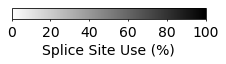

In [20]:
fig = figure(figsize=(3,1))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm.gray_r,
                                   norm=norm,
                                   orientation='horizontal')
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_ticks(arange(0,1.2,0.2))
ax.xaxis.set_ticklabels(arange(0,101,20))
ax.tick_params(size=2)
ax.set_xlabel('Splice Site Use (%)',fontsize=14)
if SAVEFIGS:
    name = 'SS Prediction Colorbar'
    fig.savefig(figdir+name+'.png', bbox_inches='tight',dpi=300)
    fig.savefig(figdir+name+'.eps', bbox_inches='tight',dpi=300)
    fig.savefig(figdir+name+'.pdf', bbox_inches='tight',dpi=300)

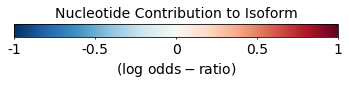

In [21]:
fig = figure(figsize=(5,1.25))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
norm = mpl.colors.Normalize(vmin=-0.4, vmax=.4)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm.RdBu_r,
                                   norm=norm,
                                   orientation='horizontal')
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_ticks(arange(0,1.01,1/4.))
ax.xaxis.set_ticklabels([-1,-0.5,0,0.5,1])
ax.set_title('Nucleotide Contribution to Isoform',fontsize=14)
ax.set_xlabel('$(log\ odds-ratio)$',fontsize=14)
ax.tick_params(size=2)
if SAVEFIGS:
    name = 'Nucleotide_Contribution_Colorbar'
    fig.savefig(figdir+name+'.png', bbox_inches='tight',dpi=300)
    fig.savefig(figdir+name+'.eps', bbox_inches='tight',dpi=300)
    fig.savefig(figdir+name+'.pdf', bbox_inches='tight',dpi=300)

In [22]:
seqs = pd.Series(data=A5SS_seqs.values,index=range(len(A5SS_seqs)))

In [23]:
w = data['Mer_scores'][:4**6*8]
w_mat = w.reshape(4**6,size(w)/4**6)
mer6_dict = dict(zip(dnatools.make_mer_list(6),range(4**6)))
pos_map = dict(zip(range(-80,80),[0]*40+[1]*(40-9)+[-1]*6+[2,3,4,5]+[-1]*5+[6]*29+[7]*45))
def score_seq(seq,sd):
    scores = np.zeros(90)
    for b in range(2,32)+range(45,75):
        rel_pos = b-sd
        cur_mer = seq[b:b+6]
        cur_pos_ind = pos_map[rel_pos]
        if(cur_pos_ind>=0):
            scores[b+4:b+6+4] += w_mat[mer6_dict[cur_mer],cur_pos_ind]
    return scores

ValueError: cannot reshape array of size 32849 into shape (4096,8)

In [24]:
def convertT2U(seq):
    sU = ''
    for b in seq:
        if b=='T':
            sU += 'U'
        else:
            sU += b
    return sU

def make_nt_contribution_fig_4(num,savefig=False):
    pred_li = np.array([0.]*3+list(combined_predictions[num,:80])+[0.]*7)
    data_li = np.array([0.]*3+list(Y[num,:80])+[0.]*7)
    new_sds = set(find((np.array(pred_li)>0.05) | (np.array(data_li)>0.05)))-set([3,47,82,83])
    all_sds = sorted(list(new_sds.union(set([3,47,82]))))
    seq = seqs.values[num]
    
    all_weights = []
    for sd in all_sds:
        temp_weight_row = np.zeros(90)
        if(sd==3):
            temp_weight_row = score_seq(seq,0)
        elif(sd==47):
             temp_weight_row = score_seq(seq,44)
        elif(sd==82):
            temp_weight_row = score_seq(seq,79)
        else:
            temp_weight_row = score_seq(seq,sd-4)
        all_weights.append(temp_weight_row)
    all_weights = np.array(all_weights)
    
    fig = figure(figsize=(13.5,len(all_sds)/1.75))
    for i in range(len(all_sds)):
        ax = fig.add_axes((0,(len(all_sds)-i-1)/float(len(all_sds)),0.71,0.5/len(all_sds)))
        ax.imshow(np.array([all_weights[i],all_weights[i]]),interpolation='None',cmap=cm.RdBu_r,aspect=0.75,vmin=-1,vmax=1)
        ax.set_xticklabels([]);
        ax.set_yticklabels([]);
        ax.tick_params(size=0)
        cur_row =i
        cur_pos = all_sds[i]
        ax = fig.add_axes((0,(len(all_sds)-i-1+0.4)/float(len(all_sds)),0.71,0.5/len(all_sds)))
        ax.set_xticklabels([]);
        ax.set_yticklabels([]);
        ax.tick_params(size=0)
        box('off')
        rect1 = matplotlib.patches.Rectangle((0,0.1), cur_pos, .5, color=(0.2,0.2,0.2))
        ax.add_patch(rect1)
        ax.plot([cur_pos,90],[0.35,0.35],color=(0.2,0.2,0.2),linewidth=2)
        axis([0,90,0,1])
        if(i==0):
            ax.set_xticks(arange(90)+0.5)
            ax.set_xticklabels('GAGG'+convertT2U(seq))
            for tick in ax.get_xaxis().get_major_ticks():
                tick.set_pad(-5.)
            ax.xaxis.tick_top()
            ax.tick_params(labelsize=10)
        if(all_sds[i]==3):
            ylab = '$SD_1$'
        elif(all_sds[i]==47):
            ylab = '$SD_2$'
        elif(all_sds[i]==82):
            ylab = '$SD_{CRYPT}$'
        else:
            ylab = '$SD_{NEW}$'
            
        text(-0.55,0,ylab,fontsize=fsize,rotation=0,ha='right')
    ax = fig.add_axes((0.72,0,0.15,0.92))
    bars = ax.barh(arange(len(all_sds)),pred_li[all_sds[::-1]],height=0.3,color='white')
    ax.barh(arange(len(all_sds))+0.35,data_li[all_sds[::-1]],height=0.3,color='gray')
    axis([0,1,-0.05,len(all_sds)-0.25])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xticks(arange(0,1.01,0.25))
    ax.set_xticklabels([0,0.25,0.5,0.75,1])
    ax.tick_params(size=0,labelsize=fsize)
    ax.set_yticklabels([])
    ax.set_xlabel('Isoform Fraction',fontsize=fsize)
    if savefig:
        name = 'ExamplePredictionEffectsnt/Individual_Nucleotide_Contributions' + str(num)
        fig.savefig(figdir+name+'.png', bbox_inches='tight',dpi=300)
        fig.savefig(figdir+name+'.eps', bbox_inches='tight',dpi=300)
        fig.savefig(figdir+name+'.pdf', bbox_inches='tight',dpi=300)

In [25]:
def make_nt_contribution_fig_5(num,savefig=False):
    pred_li = np.array([0.]*3+list(combined_predictions[num,:80])+[0.]*7)
    data_li = np.array([0.]*3+list(Y[num,:80])+[0.]*7)
    new_sds = set(find((np.array(pred_li)>0.05) | (np.array(data_li)>0.05)))-set([3,47,82,83])
    all_sds = sorted(list(new_sds.union(set([3,47,82]))))
    seq = seqs.values[num]
    
    all_weights = []
    for sd in all_sds:
        temp_weight_row = np.zeros(90)
        if(sd==3):
            temp_weight_row = score_seq(seq,0)
        elif(sd==47):
             temp_weight_row = score_seq(seq,44)
        elif(sd==82):
            temp_weight_row = score_seq(seq,79)
        else:
            temp_weight_row = score_seq(seq,sd-4)
        all_weights.append(temp_weight_row)
    all_weights = np.array(all_weights)
    
    scaling_factor = 0.8
    fig = figure(figsize=(13.5,len(all_sds)/1.75*scaling_factor))
    for i in range(len(all_sds)):
        cur_row =i
        cur_pos = all_sds[i]
        ax = fig.add_axes((0,(len(all_sds)-i-1+0.1)/float(len(all_sds))*scaling_factor,0.71,0.85/len(all_sds)*scaling_factor))
        ax.set_xticklabels([]);
        ax.set_yticklabels([]);
        ax.tick_params(size=0)
        box('off')
        rect1 = matplotlib.patches.Rectangle((0,0.1), cur_pos, .5, color=(0.2,0.2,0.2))
        ax.add_patch(rect1)
        ax.plot([cur_pos,90],[0.35,0.35],color=(0.2,0.2,0.2),linewidth=2)
        axis([0,90,0,1])
        if(i==0):
            ax.set_xticks(arange(90)+0.5)
            ax.set_xticklabels('GAGG'+convertT2U(seq))
            for tick in ax.get_xaxis().get_major_ticks():
                tick.set_pad(-5.)
            ax.xaxis.tick_top()
            ax.tick_params(labelsize=10)
        if(all_sds[i]==3):
            ylab = '$SD_1$'
        elif(all_sds[i]==47):
            ylab = '$SD_2$'
        elif(all_sds[i]==82):
            ylab = '$SD_{CRYPT}$'
        else:
            ylab = '$SD_{NEW}$'
            
        text(-0.55,0,ylab,fontsize=fsize,rotation=0,ha='right')
    ax = fig.add_axes((0.72,0,0.15,0.92*scaling_factor))
    bars = ax.barh(arange(len(all_sds)),pred_li[all_sds[::-1]],height=0.3,color='white')
    ax.barh(arange(len(all_sds))+0.35,data_li[all_sds[::-1]],height=0.3,color='gray')
    axis([0,1,-0.05,len(all_sds)-0.25])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xticks(arange(0,1.01,0.25))
    ax.set_xticklabels([0,0.25,0.5,0.75,1])
    ax.tick_params(size=0,labelsize=fsize)
    ax.set_yticklabels([])
    ax.set_xlabel('Isoform Fraction',fontsize=fsize)
    if savefig:
        name = 'ExamplePredictionEffectsnt/Individual_Nucleotide_Contributions' + str(num)
        fig.savefig(figdir+name+'.png', bbox_inches='tight',dpi=300)
        fig.savefig(figdir+name+'.eps', bbox_inches='tight',dpi=300)
        fig.savefig(figdir+name+'.pdf', bbox_inches='tight',dpi=300)

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


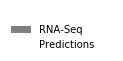

In [26]:
fig = figure(figsize=(0.4,0.25))
ax = fig.add_subplot(111)
ax.bar([1],[1],color='gray',label='RNA-Seq')
ax.bar([1],[1],color='w',label='Predictions')
leg = ax.legend(bbox_to_anchor=(0.5,0.5))
leg.get_frame().set_alpha(0)
box('off')
ax.tick_params(labelsize=0,size=0)
ax.axis([100,101,100,101])
ax.grid('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])

if SAVEFIGS:
    name = '/ExamplePredictions/Legend'
    fig.savefig(figdir+name+'.png', bbox_inches='tight',dpi=300)
    fig.savefig(figdir+name+'.eps', bbox_inches='tight',dpi=300)
    fig.savefig(figdir+name+'.pdf', bbox_inches='tight',dpi=300)

In [27]:
for i in np.random.choice(test_inds,3):
    make_nt_contribution_fig_5(i,SAVEFIGS)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  after removing the cwd from sys.path.


NameError: global name 'score_seq' is not defined

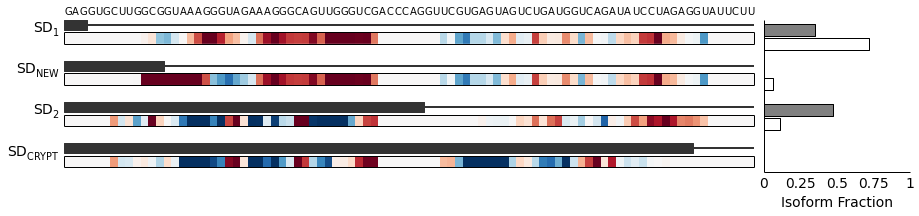

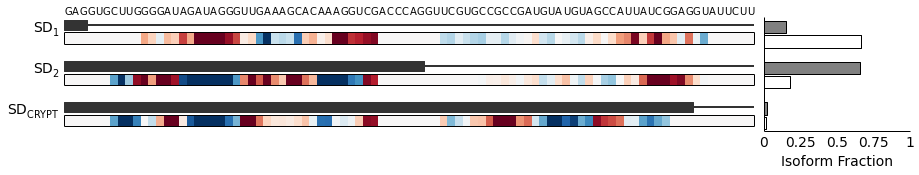

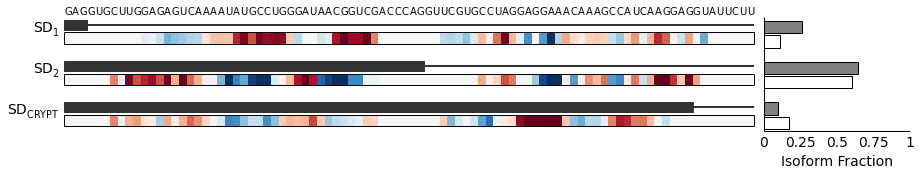

In [204]:
for i in np.random.choice(test_inds,3):
    make_nt_contribution_fig_4(i,SAVEFIGS)